Resumen de productividad ponderada por cargo:
                                   total_productividad_ponderada  total_dias  \
cargobase                                                                      
EJECUTIVO COMERCIAL                                     278419.0       32414   
EJECUTIVO COMERCIAL MEDIO TIEMPO                          1738.0         753   
EJECUTIVO COMERCIAL FIN DE SEMANA                         2996.4        1748   

                                   promedio_diario_ponderado  
cargobase                                                     
EJECUTIVO COMERCIAL                                 8.589468  
EJECUTIVO COMERCIAL MEDIO TIEMPO                    2.308101  
EJECUTIVO COMERCIAL FIN DE SEMANA                   1.714188  


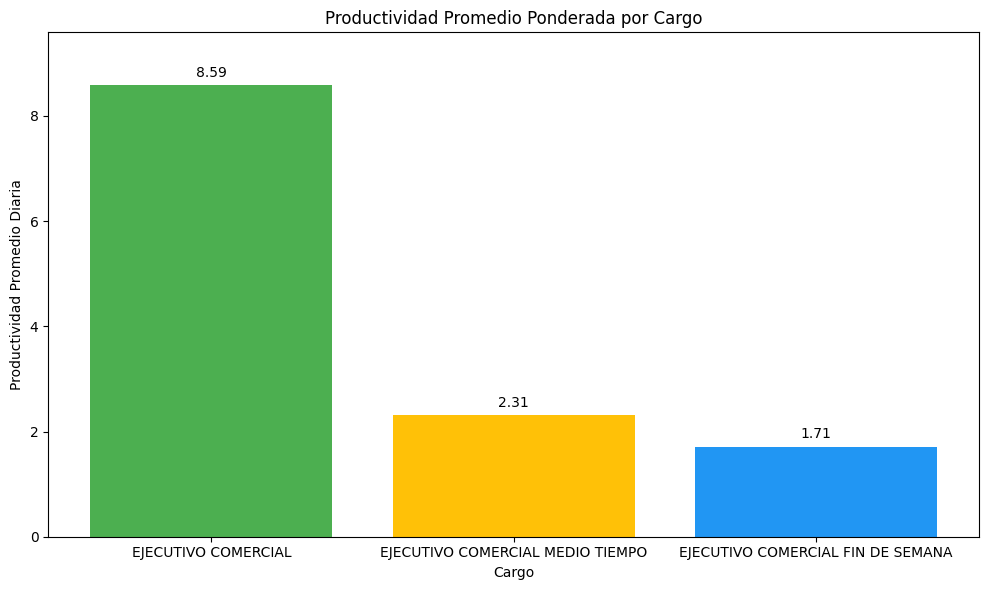

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el archivo
df = pd.read_excel("Productividad.xlsx", sheet_name="BASE")

# 2. Definir pesos de productividad por cargo
peso_cargo = {
    "EJECUTIVO COMERCIAL": 1.0,
    "EJECUTIVO COMERCIAL MEDIO TIEMPO": 0.5,
    "EJECUTIVO COMERCIAL FIN DE SEMANA": 0.4
}

# 3. Asignar peso según el cargo
df["peso_productividad"] = df["cargobase"].map(peso_cargo)

# 4. Calcular productividad ponderada
df["productividad_ponderada"] = df["capt_tot"] * df["peso_productividad"]

# 5. Calcular productividad promedio por cargo
resumen = df.groupby("cargobase").agg(
    total_productividad_ponderada=pd.NamedAgg(column="productividad_ponderada", aggfunc="sum"),
    total_dias=pd.NamedAgg(column="capt_tot", aggfunc="count")
)
resumen["promedio_diario_ponderado"] = resumen["total_productividad_ponderada"] / resumen["total_dias"]
resumen = resumen.sort_values(by="promedio_diario_ponderado", ascending=False)

# 6. Mostrar resumen
print("Resumen de productividad ponderada por cargo:")
print(resumen)

# 7. Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(resumen.index, resumen["promedio_diario_ponderado"], color=["#4CAF50", "#FFC107", "#2196F3"])
plt.title("Productividad Promedio Ponderada por Cargo")
plt.ylabel("Productividad Promedio Diaria")
plt.xlabel("Cargo")
plt.ylim(0, resumen["promedio_diario_ponderado"].max() + 1)

# Etiquetas en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("grafica_productividad.png", dpi=300)
plt.show()